ML_final project >>>
Cardiovascular

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, precision_recall_curve)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

EDA

In [ ]:
df=pd.read_csv('/content/health_data.csv')

In [ ]:
df.shape

(69999, 14)

In [ ]:
df.describe()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,49971.705224,19468.850512,0.349576,164.359148,74.205722,128.817412,96.630652,0.366862,0.226460,0.088130,0.053772,0.803726,0.499707
std,20207.115084,28850.888785,2467.265969,0.476840,8.210157,14.395857,154.012516,188.473866,0.680251,0.572274,0.283486,0.225569,0.397181,0.500003
min,0.000000,0.000000,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.500000,25006.500000,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.000000,50001.000000,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,52498.500000,74887.500000,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69998.000000,99998.000000,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   69999 non-null  int64  
 1   id           69999 non-null  int64  
 2   age          69999 non-null  int64  
 3   gender       69999 non-null  int64  
 4   height       69999 non-null  int64  
 5   weight       69999 non-null  float64
 6   ap_hi        69999 non-null  int64  
 7   ap_lo        69999 non-null  int64  
 8   cholesterol  69999 non-null  int64  
 9   gluc         69999 non-null  int64  
 10  smoke        69999 non-null  int64  
 11  alco         69999 non-null  int64  
 12  active       69999 non-null  int64  
 13  cardio       69999 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,1,168,62.0,110,80,0,0,0,0,1,0
1,1,1,20228,0,156,85.0,140,90,2,0,0,0,1,1
2,2,2,18857,0,165,64.0,130,70,2,0,0,0,0,1
3,3,3,17623,1,169,82.0,150,100,0,0,0,0,1,1
4,4,4,17474,0,156,56.0,100,60,0,0,0,0,0,0


In [ ]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,0,0,0,0,1,0
1,20228,0,156,85.0,140,90,2,0,0,0,1,1
2,18857,0,165,64.0,130,70,2,0,0,0,0,1
3,17623,1,169,82.0,150,100,0,0,0,0,1,1
4,17474,0,156,56.0,100,60,0,0,0,0,0,0


Data cleaning

In [ ]:
df['age'] = (df['age'] / 365).astype(int)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,51,0,165,64.0,130,70,2,0,0,0,0,1
3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,47,0,156,56.0,100,60,0,0,0,0,0,0


In [ ]:
df['age'].astype(int)

,age
0,50
1,55
2,51
3,48
4,47
...,...
69994,57
69995,52
69996,61
69997,52


In [ ]:
df['BMI'] = (df['weight']/(df['height']*df['height']))*10000
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,168,62.0,110,80,0,0,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,2,0,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,2,0,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,0,0,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,0,0,0,0,0,0,23.011177


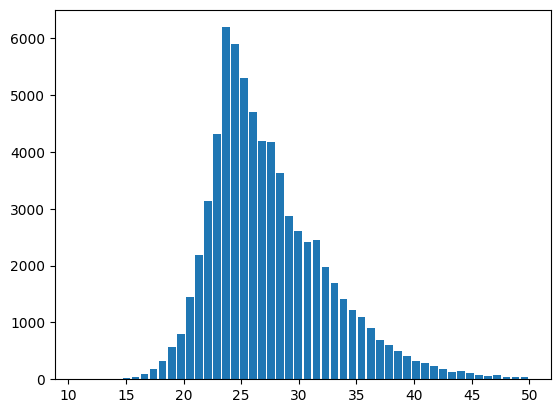

In [ ]:

%matplotlib inline
df = df[(df['BMI']>10) & (df['BMI']<50)]
plt.hist(df['BMI'],bins=50,rwidth=0.85)
plt.show()

In [ ]:
df = df[(df['ap_hi']<=300)]


In [ ]:
df = df[(df['ap_lo'] <= df['ap_hi']) & (df['ap_lo']>10)]

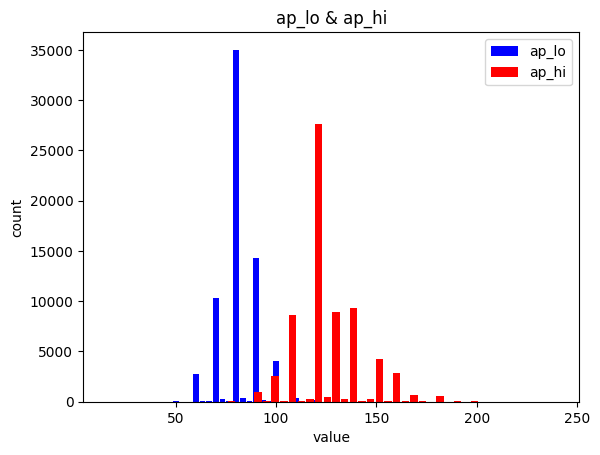

In [ ]:
plt.hist(df['ap_lo'],bins=50,rwidth=0.85,color="blue",label="ap_lo")
plt.hist(df['ap_hi'],bins=50,rwidth=0.85,color="red",label="ap_hi")
plt.legend()
plt.title("ap_lo & ap_hi")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

In [ ]:
df.cholesterol.unique()

array([0, 2, 1])

In [ ]:
# df = df.drop(df[(df['cholesterol'] == 2) & (df['cardio'] == 0)].index)
# df

In [ ]:
# df = df.drop(df[(df['cholesterol'] == 0) & (df['cardio'] == 1)].index)
# df

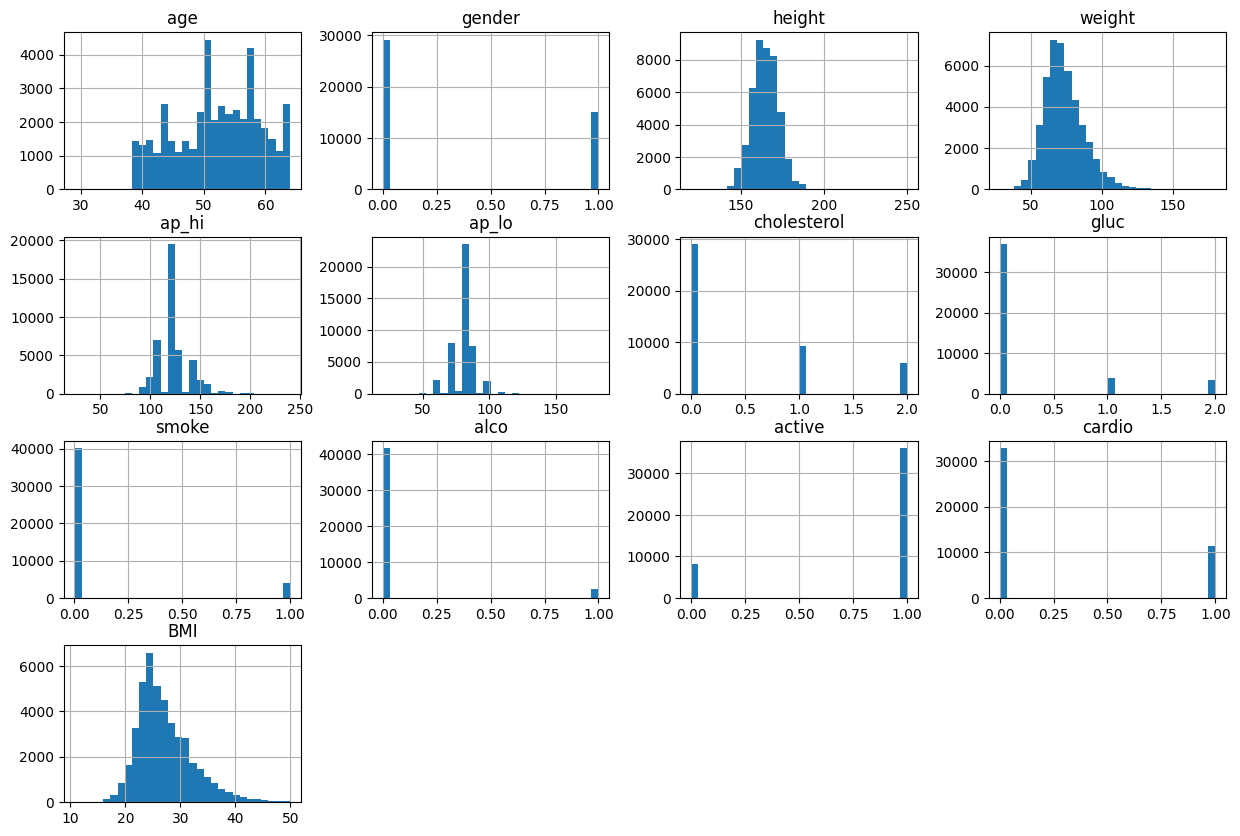

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()


Distribution of the target variable 'cardio':


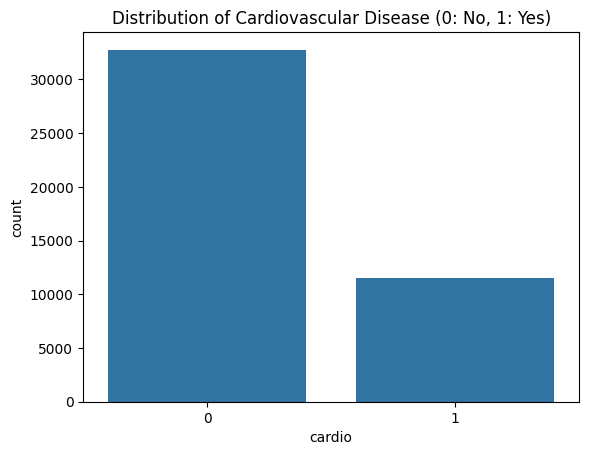

In [ ]:
print("\nDistribution of the target variable 'cardio':")
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease (0: No, 1: Yes)')
plt.show()


Age distribution:


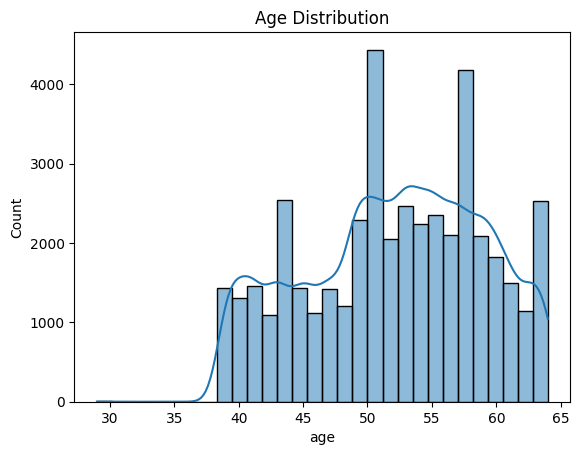

In [ ]:
print("\nAge distribution:")
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


Gender distribution:


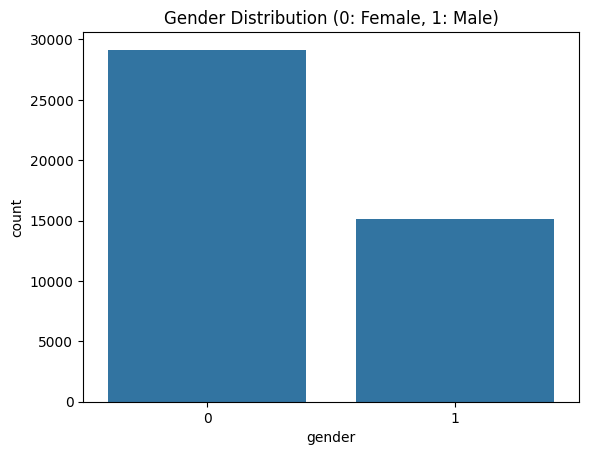

In [ ]:
print("\nGender distribution:")
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution (0: Female, 1: Male)')
plt.show()

Visualization

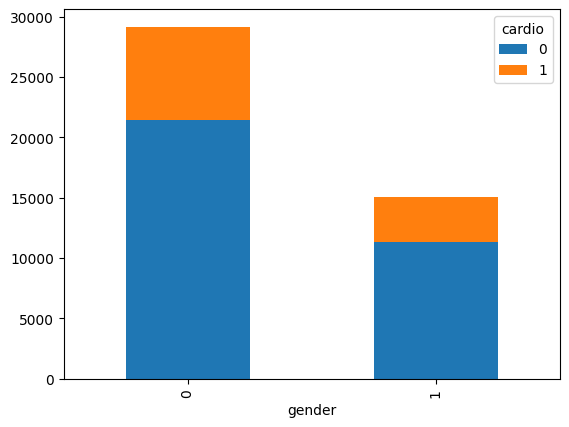

In [ ]:
pd.crosstab(df['gender'], df['cardio']).plot(kind='bar', stacked=True)
plt.show()


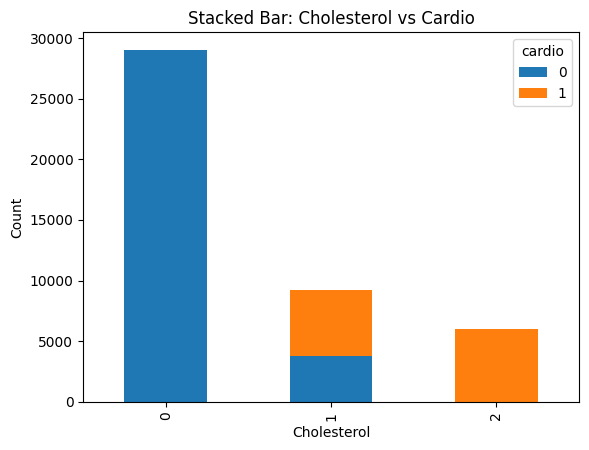

In [ ]:
pd.crosstab(df['cholesterol'], df['cardio']).plot(kind='bar', stacked=True)
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Stacked Bar: Cholesterol vs Cardio")
plt.show()


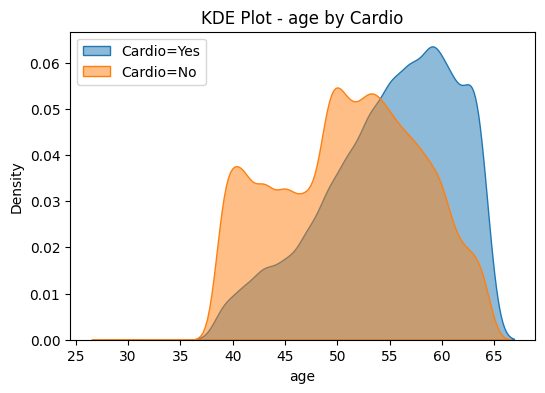

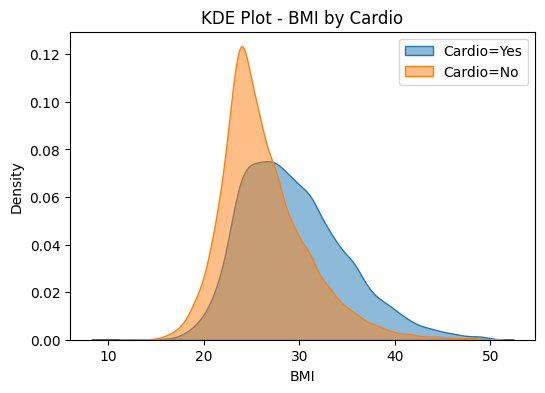

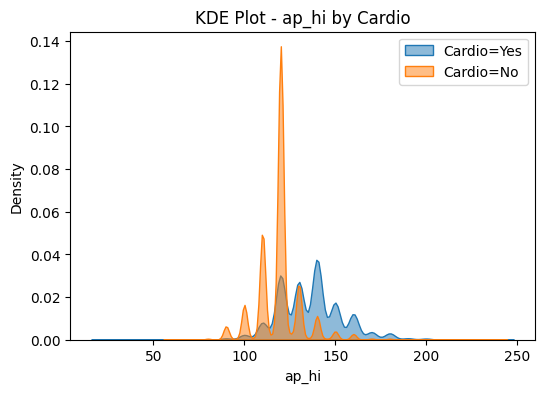

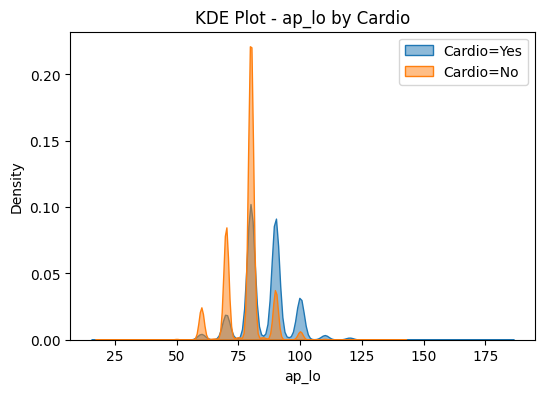

In [ ]:
num_cols = ['age', 'BMI', 'ap_hi', 'ap_lo']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['cardio']==1][col], fill=True, alpha=0.5, label="Cardio=Yes")
    sns.kdeplot(df[df['cardio']==0][col], fill=True, alpha=0.5, label="Cardio=No")
    plt.title(f"KDE Plot - {col} by Cardio")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [ ]:
print(df.columns)


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')


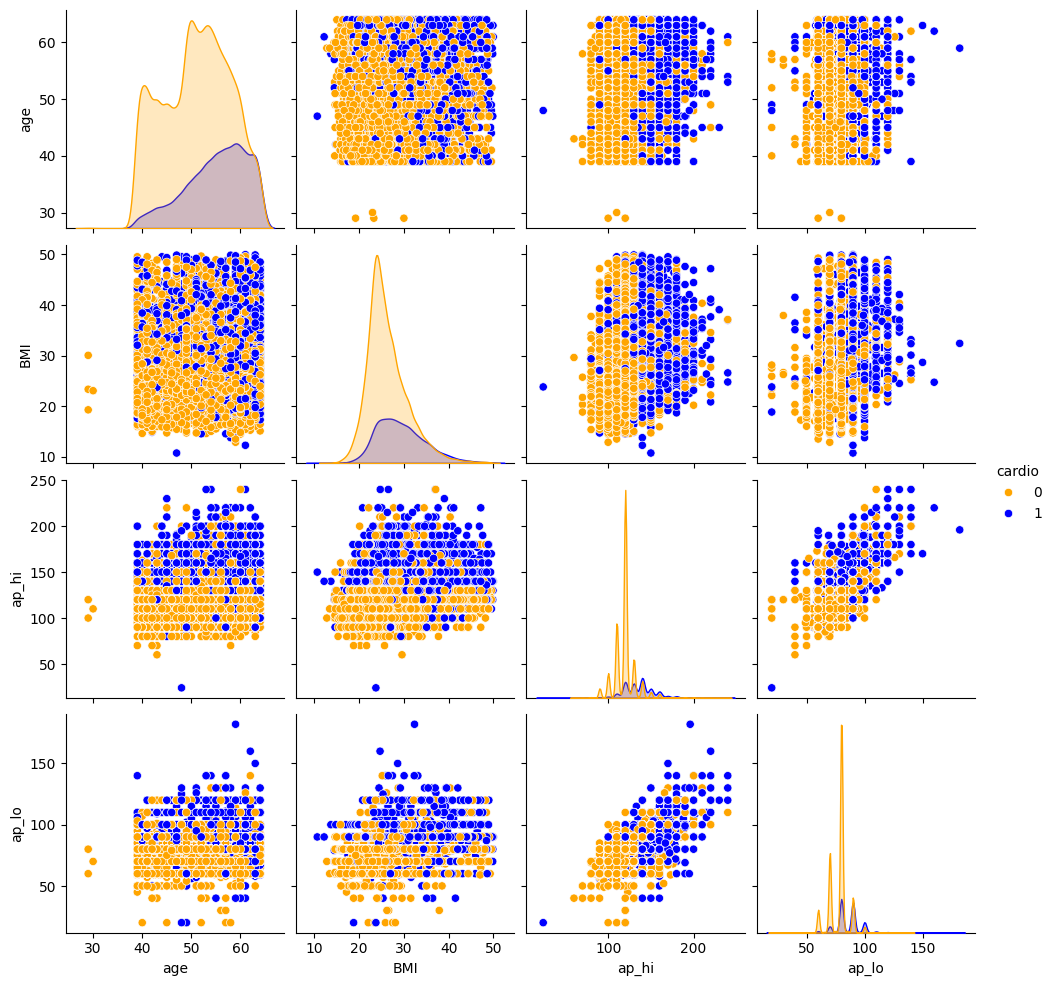

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(
    df,
    vars=num_cols,
    hue='cardio',
    palette={1:'blue', 0:'orange'},
    diag_kind='kde'
)

plt.show()

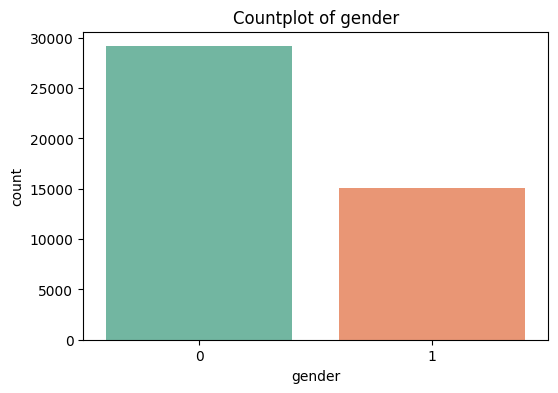

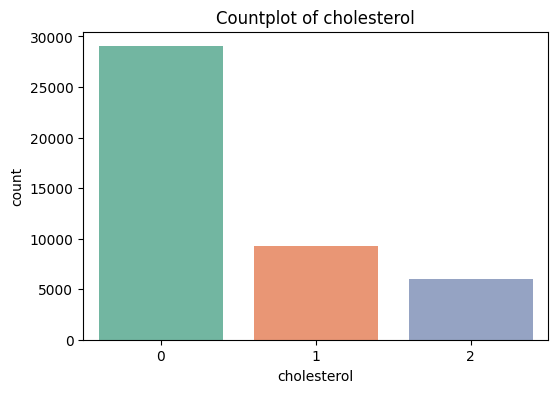

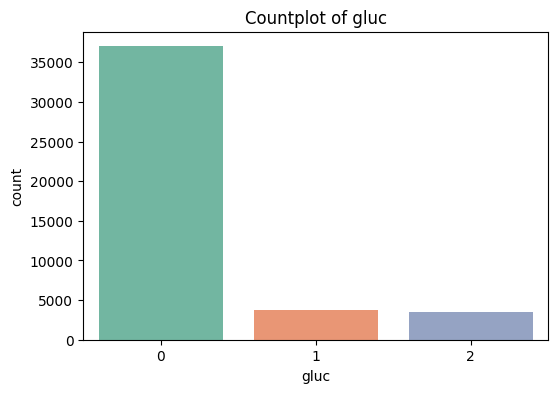

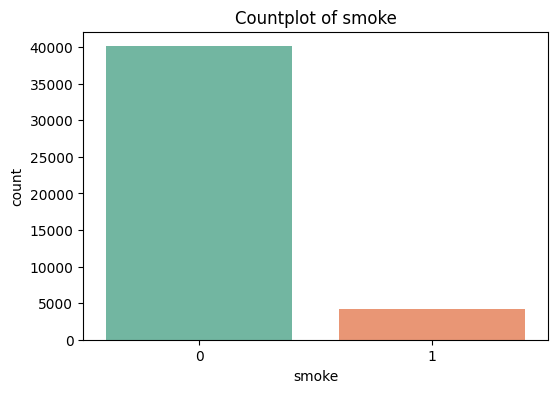

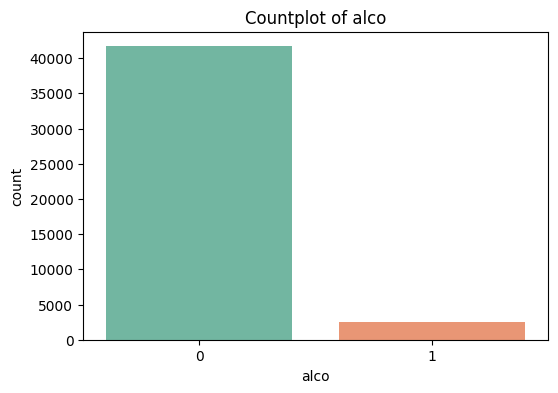

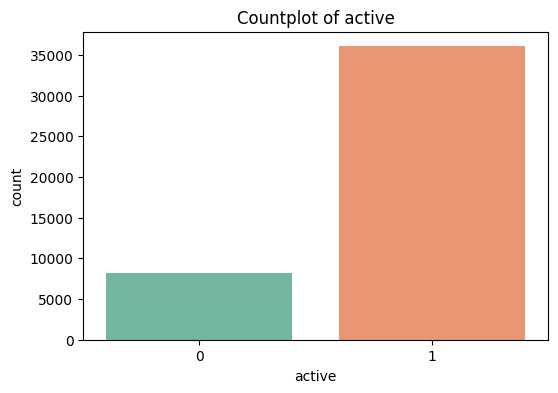

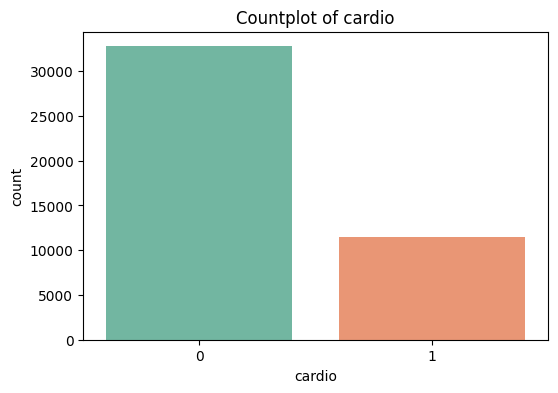

In [ ]:
cat_cols = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Countplot of {col}")
    plt.show()

Data spilit

In [ ]:
X = df.drop(columns=['cardio'])
Y = df['cardio']

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
smote.fit(X,Y)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [ ]:
print(f"y=0 :{len(Y[Y==0])}")
print(f"y=1 :{len(Y[Y==1])}")

y=0 :32762
y=1 :11490


Smote

In [ ]:
print(f"y_resampled=0 :{len(y_resampled[y_resampled==0])}")
print(f"y_resampled=1 :{len(y_resampled[y_resampled==1])}")

y_resampled=0 :32762
y_resampled=1 :32762


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

AI Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
}


In [ ]:
accuracies = {}
for name, model in models.items():
    print("="*40)
    print(f"Model: {name}")


    if name in ["Logistic Regression","Support Vector Machine","KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    if name in ["Logistic Regression",  "KNN",  "Support Vector Machine"]:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    print("Cross-validation mean accuracy:", cv_scores.mean())
    print(classification_report(y_test, y_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    accuracies[name] = accuracy_score

Model: Logistic Regression
Cross-validation mean accuracy: 0.9468669330810883
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      9760
           1       0.91      0.99      0.95      9898

    accuracy                           0.95     19658
   macro avg       0.95      0.95      0.95     19658
weighted avg       0.95      0.95      0.95     19658

Test Accuracy: 0.9468918506460474
Model: Decision Tree
Cross-validation mean accuracy: 0.9351153638994794
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      9760
           1       0.94      0.94      0.94      9898

    accuracy                           0.94     19658
   macro avg       0.94      0.94      0.94     19658
weighted avg       0.94      0.94      0.94     19658

Test Accuracy: 0.9364635262997253
Model: Naive Bayes
Cross-validation mean accuracy: 0.9176077929961511
              precision    recall  f1-score   support

   

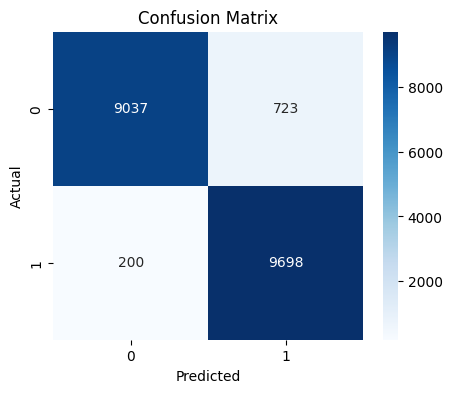

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Neural NET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_scaled, y_train,
    epochs=20, batch_size=128,
    validation_split=0.2,
    verbose=1
)
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8808 - loss: 0.3010 - val_accuracy: 0.9445 - val_loss: 0.1380
Epoch 2/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1385 - val_accuracy: 0.9446 - val_loss: 0.1368
Epoch 3/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9454 - loss: 0.1349 - val_accuracy: 0.9445 - val_loss: 0.1389
Epoch 4/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9475 - loss: 0.1337 - val_accuracy: 0.9441 - val_loss: 0.1366
Epoch 5/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9483 - loss: 0.1274 - val_accuracy: 0.9448 - val_loss: 0.1361
Epoch 6/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9458 - loss: 0.1320 - val_accuracy: 0.9451 - val_loss: 0.1361
Epoch 7/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1312 - val_accuracy: 0.9448 - val_loss: 0.1349
Epoch 8/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1308 - val_accuracy: 0